### Read gene expression file

In [36]:
import pandas as pd
import os
import importlib
import clean_gene_name  # import the module first
importlib.reload(clean_gene_name)  # reload the module
from clean_gene_name import clean_gene_name  # re-import the updated function

# Folder path
path = ('/Users/atanugiri/.cache/kagglehub/datasets/mahdiehhajian/'
'gene-expression-in-gastric-cancer/versions/1')

# Full file path
file_path = os.path.join(path, 'expression profile(8863 genes).csv')

# Read the CSV and set first column as index
df = pd.read_csv(file_path, index_col=0)

# Preview
print(df.head(2))
print(df.shape)

       TCGA-BR-4279-01  TCGA-VQ-A94T-01  TCGA-BR-8589-01  TCGA-BR-A4IV-01  \
A1CF           10.4647           6.6146          10.4016           4.6554   
A2ML1           0.0000           4.3985           2.4817           1.3475   

       TCGA-VQ-A8E2-01  TCGA-BR-8297-01  TCGA-D7-A4YY-01  TCGA-BR-4280-01  \
A1CF            9.8054           4.7419           5.1548          10.5675   
A2ML1           3.4159           2.4948           6.3345           0.0000   

       TCGA-D7-A74A-01  TCGA-F1-6177-01  ...  GTEX-QV44-1226-SM-4R1KE  \
A1CF            9.4567          10.7863  ...                   5.7464   
A2ML1           6.7217           0.0000  ...                   3.5820   

       GTEX-13PVQ-2126-SM-5L3FW  GTEX-SNMC-0626-SM-4DM6H  \
A1CF                     3.5094                   5.3059   
A2ML1                    3.3348                   4.4367   

       GTEX-WZTO-2126-SM-4PQYW  GTEX-Q2AH-1126-SM-48TZM  \
A1CF                    3.2506                   5.4593   
A2ML1            

### Sort genes by mean expression

In [27]:
df['mean_expression'] = df.mean(axis=1)
df_sorted = df.sort_values('mean_expression', ascending=False)
print(df_sorted[['mean_expression']].head())

        mean_expression
MT-CO1        20.441745
ACTB          17.813150
ACTG1         16.995492
B2M           16.381114
GAPDH         16.359765


# Find overlapping genes among gastric cancer, hypercholesterolemia, and obesity datasets

### hypercholesterolemia genes

In [28]:
chol_file = ('/Users/atanugiri/Downloads/gastric cancer data analysis/'
'Hypercholesterolemia_gene_links_updated_final.xlsx')

df_chol = pd.read_excel(chol_file, skiprows=2)

# Extract genes from specified locations
genes_part1 = df_chol.iloc[0:27, 1]
genes_part2 = df_chol.iloc[28:82, 0]
genes_part3 = df_chol.iloc[83:178, 0]

# Concatenate all parts into a single list
chol_genes = pd.concat([genes_part1, genes_part2, genes_part3]).dropna().tolist()

chol_genes = [clean_gene_name(g) for g in chol_genes]
print(chol_genes)

['APOB', 'APOE', 'EPHX2', 'CFHR1', 'APOA2', 'HMCN1', 'PPP1R17', 'CFHR3', 'LDLRAP1', 'LDLR', 'PCSK9', 'GHR', 'PSEN1', 'ABCA4', 'FBLN5', 'HTRA1', 'CFH', 'C3', 'CST3', 'RAX2', 'ERCC6', 'ARMS2', 'CX3CR1', 'CFI', 'C2', 'C9', 'LDLR', 'DAB2', 'APOB', 'PCSK9', 'LDLRAP1', 'SLC37A4', 'PHKG', 'PHKA2', 'PYGL', 'GALK1', 'FOS', 'CAV3', 'CAVIN1', 'RAI1', 'PLVAP', 'CAV1', 'LMNA', 'BSCL2', 'AGPAT2', 'OCRL', 'SLC7A7', 'TSHB', 'TDP1', 'SETX', 'APTX', 'PPARG', 'ALB', 'DGAT1', 'TTPA', 'GHR', 'DYRK1B', 'NUP107', 'JAG1', 'TBLX1', 'RSPO1', 'COG4', 'MTX2', 'CYP7A1', 'SLC25A13', 'APOC3', 'DAAM2', 'TMEM199', 'CCDC115', 'LIPC', 'MTHFR', 'ABCG5', 'ABCG8', 'CETP', 'LIPA', 'APOE2', 'CEP19', 'PIK3R5', 'DMPK', 'ABCA1', 'ABCG1', 'ACAT', 'AKT', 'AP-1', 'APOA1', 'APOC3', 'ASC', 'ATF4', 'ATF6', 'BAX', 'BCL-2', 'BID', 'BIP', 'BRAP1', 'BRAP2', 'CASP1', 'CASP3', 'CD36', 'CD40', 'CD40L', 'CHOP', 'CK', 'CREB', 'CRP', 'CSF1R', 'CYLD', 'DAPK1', 'DNA-PK', 'ER-α', 'ERK', 'FADD', 'FAK', 'FLIP', 'GRP78', 'GSK3β', 'HMGCR', 'ICAM-1', 

### Obesity genes

In [29]:
obesity_file = ('/Users/atanugiri/Downloads/gastric cancer data analysis/'
'obesity_gene_links_updated_final.xlsx')

df_obesity = pd.read_excel(obesity_file)

print(df_obesity.head(2))

obesity_genes = df_obesity["Gene Name"].dropna().tolist()
obesity_genes = [clean_gene_name(g) for g in obesity_genes]
print(obesity_genes)

  Gene Name Unnamed: 1 STRING
0   HDAC6          NaN    NaN
1   L3STL          NaN    NaN
['HDAC6', 'L3STL', 'INPP5E', 'VPS13B', 'CEP19', 'MKS1', 'WDR35', 'WDR19', 'TTC8', 'TMEM67', 'CC2D2A', 'BBS7', 'BBS1', 'BBS5', 'BBS4', 'BBS9', 'BBS2', 'BBS12', 'TRIM32', 'ARL6', 'BBS10', 'MKKS', 'CEP290', 'ALMS1', 'ADGRG3', 'CELA2A', 'MAGEL2', 'DYRK1B', 'NTRK2', 'KIDINS220', 'GNAT3', 'GNAS', 'ENPP1', 'ENPP2', 'MRAP', 'MRAP2', 'NR0B2', 'SLC6A14', 'TUB', 'GRP', 'LEP', 'LEPR', 'MC3R', 'MC4R', 'MC5R', 'ADCY3', 'RET', 'POMC', 'CHRM3', 'CHRM4', 'INS', 'ADIPOQ', 'UCP1', 'UCP2', 'UCP3', 'NR5A2', 'HNF4A', 'FTO', 'PARP1', 'PARG', 'PRKAG2', 'PRKAG3', 'AGRP', 'NPY', 'NPY1R', 'NPY2R', 'NPY4R', 'NPY5R', 'CARTPT', 'UCN', 'UCN2', 'UCN3', 'HCRTR1', 'HCRTR2', 'NR3C1', 'NR3C2', 'EIF2S3', 'PPARG', 'POMC', 'NR0B2', 'SDC3', 'GHRL', 'CARTPT', 'ENPP1', 'ADRB3', 'UCP3', 'AGRP', 'NEUROD1', 'SLC2A2', 'WFS1', 'IL6', 'GCK', 'PAX4', 'ABCC8', 'HNF1A', 'PDX1', 'IPC', 'HNF1B', 'AKT2', 'HNF4A', 'IRS', 'TNF', 'TNF-α', 'TNFR1', 'IL-6

### Common genes

In [37]:
gc_genes = df_sorted.index
gc_genes = [clean_gene_name(g) for g in gc_genes]

common_genes_gc_chol = set(chol_genes) & set(gc_genes)
print(f"{len(common_genes_gc_chol)} common GC and Chol genes found:\n{common_genes_gc_chol}")
print("\n")

common_genes_gc_ob = set(obesity_genes) & set(gc_genes)
print(f"{len(common_genes_gc_ob)} common GC and Obesity genes found:\n{common_genes_gc_ob}")
print("\n")

common_genes_gc_chol_ob = set(gc_genes) & set(chol_genes) & set(obesity_genes)
print(f"{len(common_genes_gc_chol_ob)} common GC and Chol and Obesity genes found:\n{common_genes_gc_chol_ob}")

28 common GC and Chol genes found:
{'LIPA', 'LIPC', 'FBLN5', 'BID', 'PDIA3', 'CX3CR1', 'CETP', 'RSPO1', 'HMCN1', 'ATF4', 'PCSK9', 'SLC7A7', 'APOE', 'DMPK', 'CRP', 'CD36', 'CFI', 'ALB', 'AGPAT2', 'DAAM2', 'CAV3', 'C2', 'ABCG5', 'ABCG8', 'GHR', 'APOA1', 'SYK', 'CAV1'}


36 common GC and Obesity genes found:
{'GHRL', 'PRKAG2', 'HNF1B', 'ADRB3', 'HNF1A', 'CARTPT', 'INS', 'HNF4A', 'UCN2', 'OGT', 'NPY1R', 'UCN3', 'UCP2', 'GRP', 'LEPR', 'GCK', 'CELA2A', 'NPY5R', 'CD36', 'NPY', 'WDR19', 'POMC', 'MRAP', 'NPY2R', 'RET', 'PDX1', 'ADIPOQ', 'NEUROD1', 'TNF', 'ABCC8', 'LEP', 'CHRM3', 'SLC6A14', 'TUB', 'NR5A2', 'PAX4'}


1 common GC and Chol and Obesity genes found:
{'CD36'}


# Sex, Age, Race analysis

### Read tsv files

In [69]:
file_paths = ['tcga_gdc_clinical_data.tsv',
              'tcga_pub_clinical_data.tsv']

combined_df = pd.DataFrame()

for path in file_paths:
    if 'tcga_gdc_clinical_data.tsv' in path:
        usecols = ['Sample ID', 'Diagnosis Age', 'Race Category', 'Sex', 'Biopsy Site']
        df = pd.read_csv(path, sep='\t', usecols=usecols)
        df = df.rename(columns={'Biopsy Site': 'Anatomic Region'})  # normalize column name
    else:
        usecols = ['Sample ID', 'Diagnosis Age', 'Race Category', 'Sex', 'Anatomic Region']
        df = pd.read_csv(path, sep='\t', usecols=usecols)
    
    combined_df = pd.concat([combined_df, df], ignore_index=True)

print("Combined shape:", combined_df.shape)

# Drop duplicates
combined_df = combined_df.drop_duplicates(subset='Sample ID', keep='first')

# Check shapes
print("Unique Sample ID shape:", combined_df_unique.shape)

Combined shape: (738, 5)
Unique Sample ID shape: (443, 5)


In [71]:
from normalize_race import normalize_race
# Apply normalization
combined_df['Race Category'] = combined_df['Race Category'].apply(normalize_race)

In [72]:
print(combined_df['Race Category'].unique())
print(combined_df['Sex'].unique())
print(combined_df['Diagnosis Age'].unique())
print(combined_df['Anatomic Region'].unique())

['White' 'Asian' 'Unknown' 'Black or African American'
 'Native Hawaiian or Other Pacific Islander']
['Male' 'Female']
[nan 51. 62. 52. 74. 60. 55. 70. 56. 53. 72. 66. 80. 76. 79. 43. 78. 73.
 65. 58. 87. 75. 71. 54. 59. 69. 57. 46. 67. 64. 68. 63. 41. 81. 50. 49.
 61. 42. 84. 89. 45. 77. 34. 47. 39. 82. 48. 86. 83. 85. 88. 44. 30. 35.]
['Lesser curvature of stomach, NOS' 'Stomach, NOS' 'Body of stomach'
 'Fundus of stomach' 'Cardia, NOS' 'Gastric antrum' 'Pylorus']


### Print tsv file column names

In [21]:
# Specify the path and the columns we want to load
file_path = 'tcga_gdc_clinical_data.tsv'
columns_to_use = ['Patient ID', 'Sample ID', 'Diagnosis Age', 'Disease Free (Months)', 
                 'Disease Free Status', 'Fraction Genome Altered', 'ICD-10 Classification',
                 'Mutation Count', 'Overall Survival (Months)', 'Overall Survival Status',
                 'AJCC Pathologic M-Stage', 'AJCC Pathologic N-Stage', 'AJCC Pathologic Stage',
                 'AJCC Pathologic T-Stage', 'Race Category', 'Sex']
# Read the file with tab separator and selected columns
df = pd.read_csv(file_path, sep='\t', usecols=columns_to_use)

# Preview the data
print(df.head())
print(df.shape)

     Patient ID        Sample ID  Diagnosis Age  Disease Free (Months)  \
0  TCGA-3M-AB46  TCGA-3M-AB46-01            NaN              58.026761   
1  TCGA-3M-AB47  TCGA-3M-AB47-01            NaN                    NaN   
2  TCGA-B7-5816  TCGA-B7-5816-01           51.0              26.695598   
3  TCGA-B7-5818  TCGA-B7-5818-01           62.0                    NaN   
4  TCGA-B7-A5TI  TCGA-B7-A5TI-01           52.0              19.561429   

  Disease Free Status  Fraction Genome Altered ICD-10 Classification  \
0       0:DiseaseFree                   0.5104                 C16.5   
1                 NaN                   0.1697                 C16.9   
2       0:DiseaseFree                   0.0873                 C16.2   
3                 NaN                   0.2063                 C16.2   
4       0:DiseaseFree                   0.2294                 C16.1   

   Mutation Count  Overall Survival (Months) Overall Survival Status  \
0           157.0                  57.982917      

In [22]:
# Convert status to numeric
status_map = {'0:LIVING': 0, '1:DECEASED': 1}
df["Overall Survival Status"] = df["Overall Survival Status"].map(status_map)

In [23]:
print(df["Overall Survival Status"].unique())

[ 0.  1. nan]


In [19]:
# Create a mapping dictionary for "Overall Survival Status"
survival_map = {
    '0:LIVING': 'Alive',
    '1:DECEASED': 'Dead'
}

# Map the values
mapped_status = df["Overall Survival Status"].map(survival_map)

# Boolean series showing where the mapped values match
match = mapped_status == df["Patient's Vital Status"]

# Print how many match
print(f"Matches: {match.sum()} / {match.notna().sum()}")  # exclude NaNs

Matches: 442 / 443


In [20]:
mismatch_df = df[match == False][["Overall Survival Status", "Patient's Vital Status"]]
print(mismatch_df.head())

    Overall Survival Status Patient's Vital Status
321                     NaN                    NaN


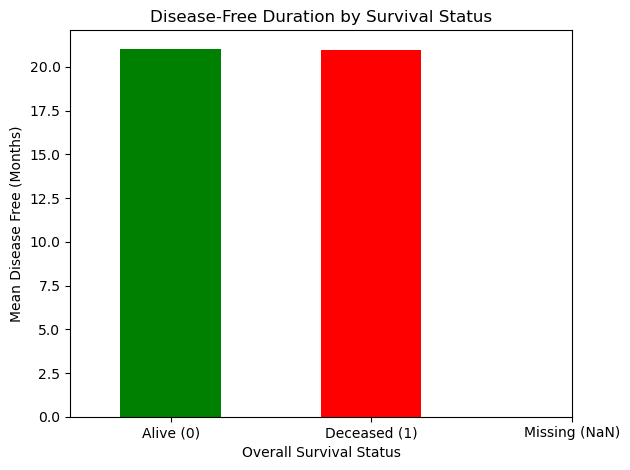

In [26]:
disease_free = df[["Disease Free (Months)", "Overall Survival Status"]]
import matplotlib.pyplot as plt

# Group by survival status (0, 1, nan) and compute mean
means = disease_free.groupby("Overall Survival Status")["Disease Free (Months)"].mean()

# Plot
means.plot(kind='bar', color=['green', 'red', 'gray'])
plt.xticks(ticks=[0, 1, 2], labels=['Alive (0)', 'Deceased (1)', 'Missing (NaN)'], rotation=0)
plt.ylabel("Mean Disease Free (Months)")
plt.title("Disease-Free Duration by Survival Status")
plt.tight_layout()
plt.show()

In [27]:
print(df["Disease Free (Months)"].unique)

<bound method Series.unique of 0      58.026761
1            NaN
2      26.695598
3            NaN
4      19.561429
         ...    
438    17.260085
439          NaN
440          NaN
441          NaN
442          NaN
Name: Disease Free (Months), Length: 443, dtype: float64>


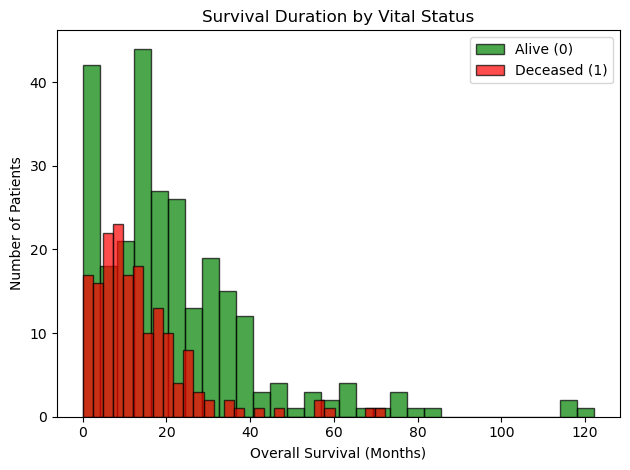

In [29]:
import matplotlib.pyplot as plt

# Separate data
alive = df[df["Overall Survival Status"] == 0]["Overall Survival (Months)"].dropna()
deceased = df[df["Overall Survival Status"] == 1]["Overall Survival (Months)"].dropna()

# Plot
plt.hist(alive, bins=30, alpha=0.7, label='Alive (0)', color='green', edgecolor='black')
plt.hist(deceased, bins=30, alpha=0.7, label='Deceased (1)', color='red', edgecolor='black')

plt.xlabel("Overall Survival (Months)")
plt.ylabel("Number of Patients")
plt.title("Survival Duration by Vital Status")
plt.legend()
plt.tight_layout()
plt.show()

In [30]:
counts = df["Overall Survival Status"].value_counts(dropna=False)
print(counts)

Overall Survival Status
0.0    267
1.0    175
NaN      1
Name: count, dtype: int64


### Subset for Alive (Status = 0)

In [31]:
alive_df = df[df["Overall Survival Status"] == 0][[
    "Disease Free (Months)", "Disease Free Status", "Overall Survival (Months)"
]]
print("🟢 Alive Patients:")
print(alive_df.head())

🟢 Alive Patients:
   Disease Free (Months) Disease Free Status  Overall Survival (Months)
0              58.026761       0:DiseaseFree                  57.982917
2              26.695598       0:DiseaseFree                  26.675427
3                    NaN                 NaN                  11.695138
4              19.561429       0:DiseaseFree                  19.546649
5              11.013578       0:DiseaseFree                  11.005256


### Subset for Deceased (Status = 1)

In [32]:
deceased_df = df[df["Overall Survival Status"] == 1][[
    "Disease Free (Months)", "Disease Free Status", "Overall Survival (Months)"
]]
print("🔴 Deceased Patients:")
print(deceased_df.head())

🔴 Deceased Patients:
    Disease Free (Months) Disease Free Status  Overall Survival (Months)
1                     NaN                 NaN                        NaN
8                     NaN                 NaN                   6.603154
9                     NaN                 NaN                   6.964520
10                    NaN                 NaN                   4.632063
11                    NaN                 NaN                   7.424442


### Save alive and deceased files

In [33]:
# Save alive patients
alive_df.to_csv("alive_patients.csv", index=False)

# Save deceased patients
deceased_df.to_csv("deceased_patients.csv", index=False)

print("✅ CSV files saved: 'alive_patients.csv', 'deceased_patients.csv'")

✅ CSV files saved: 'alive_patients.csv', 'deceased_patients.csv'


### Survival months by ALive and Deceased

/var/folders/_n/c65sg0c951g6vgwcpzsdc2tc0000gn/T/ipykernel_77409/490888047.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=combined, x="Status", y="Overall Survival (Months)", palette=["green", "red"])


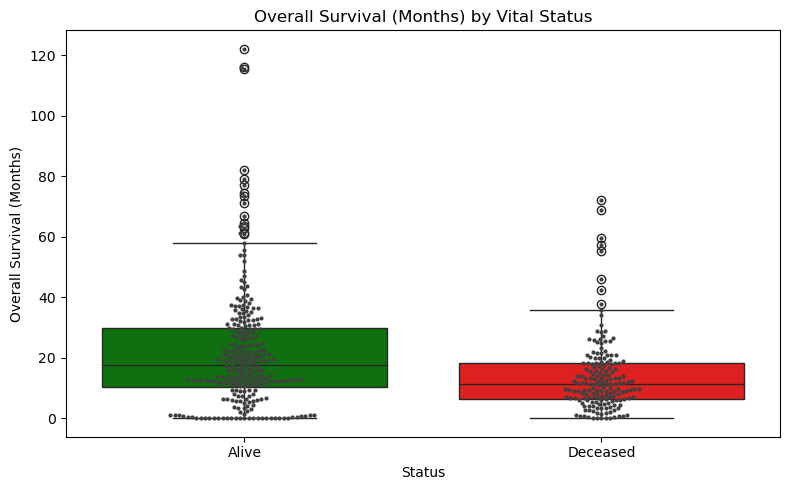

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Combine with a group label for plotting
alive_plot = alive_df.copy()
alive_plot["Status"] = "Alive"

deceased_plot = deceased_df.copy()
deceased_plot["Status"] = "Deceased"

combined = pd.concat([alive_plot, deceased_plot])

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(data=combined, x="Status", y="Overall Survival (Months)", palette=["green", "red"])
sns.swarmplot(data=combined, x="Status", y="Overall Survival (Months)", color=".25", size=3)
plt.title("Overall Survival (Months) by Vital Status")
plt.tight_layout()
plt.show()